In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd

In [2]:
# First neighbourhood size attempt

outbreak_threshold = 20

def run_plots(file):
    
    data = pd.read_csv(file, header=6)
    
    tourist_counts = list(set(data['tourist-count']))
    tourist_counts.sort()
    print(tourist_counts)
    
    tourist_groups = {}
    
    for c in tourist_counts:
        tourist_groups[c] = data[data['tourist-count'] == c]
        
    groups = len(tourist_groups)
    #colours = [matplotlib.colors.hsv_to_rgb((0, 1, (i+ 1) / groups)) for i in range(groups)]
    colours = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    
    plt.figure(figsize=(12,6))
    
    for i, c in enumerate(tourist_counts):
        runs = set(tourist_groups[c]['[run number]'])
        colour = colours[i]
        for j, run in enumerate(runs):
            run_data = tourist_groups[c][tourist_groups[c]['[run number]'] == run]
            plt.plot(run_data['ticks'], run_data['count patches with [vegetation-health < 5 and not path? and not lake?]'], label= f"{c} Tourists" if j == 0 else None, color=colour, linestyle= '-' if j==0 else ':')
    
    
    plt.title('Vegetation Patches Dead vs Days')
    plt.xlabel('Days')
    plt.ylabel('Vegetation Dead')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(12,6))
    
    for i, c in enumerate(tourist_counts):
        runs = set(tourist_groups[c]['[run number]'])
        colour = colours[i]
        for j, run in enumerate(runs):
            run_data = tourist_groups[c][tourist_groups[c]['[run number]'] == run]
            plt.plot(run_data['ticks'], run_data['happiness-avg / happiness-count'], label= f"{c} Tourists" if j == 0 else None, color=colour, linestyle= '-' if j==0 else ':')
    
    
    plt.title('Avg Tourist Happiness vs Days')
    plt.xlabel('Days')
    plt.ylabel('Avg Happiness')
    plt.legend()
    plt.show()
    
    print(max(data['ticks']))
    
    last_day = data[data['ticks'] == 99]
    
    last_avgs = []
    for c in tourist_counts:
        avg = last_day[last_day['tourist-count'] == c]['count patches with [vegetation-health < 5 and not path? and not lake?]'].mean()
        last_avgs.append(avg)
    
    plt.plot(tourist_counts, last_avgs, marker='.')
    plt.title('Avg. Vegetation Patches Dead at day 100 vs Tourists')
    plt.xlabel('Tourists')
    plt.ylabel('Vegetation Dead')
    plt.show()
    
    
    fig, ax = plt.subplots(figsize=(12, 6))
    bars = []
    
    width = 0.5
    labels = np.arange(1, 10)
    
    
    for i, c in enumerate(tourist_counts):
        series = [last_day[last_day['tourist-count'] == c]['vegetation-decile ' + str(j)].mean() for j in labels]
        print(series)
        bars.append(ax.bar((labels) + (width/6) * (i-3), series, width/6, label=f"{c} Tourists"))
        
        
    ax.set_title('Vegetation health deciles at day 100')
    ax.set_xlabel('Decile')
    ax.set_ylabel('Vegetation patches in Decile')
    ax.set_xticks(labels)
    fig.tight_layout()
    
    ax.legend()
    
    plt.show()
        
    


[100, 300, 500, 700, 900, 1500]


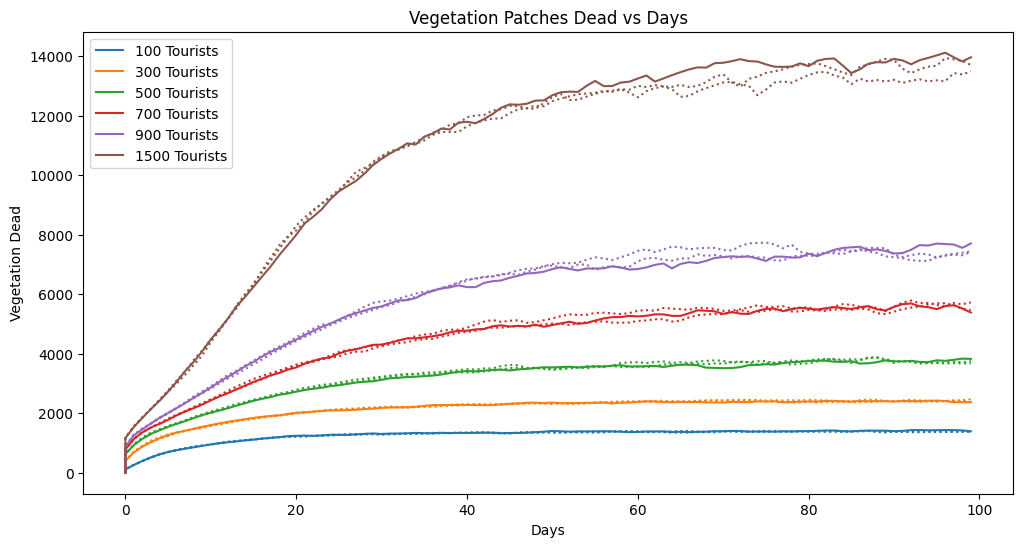

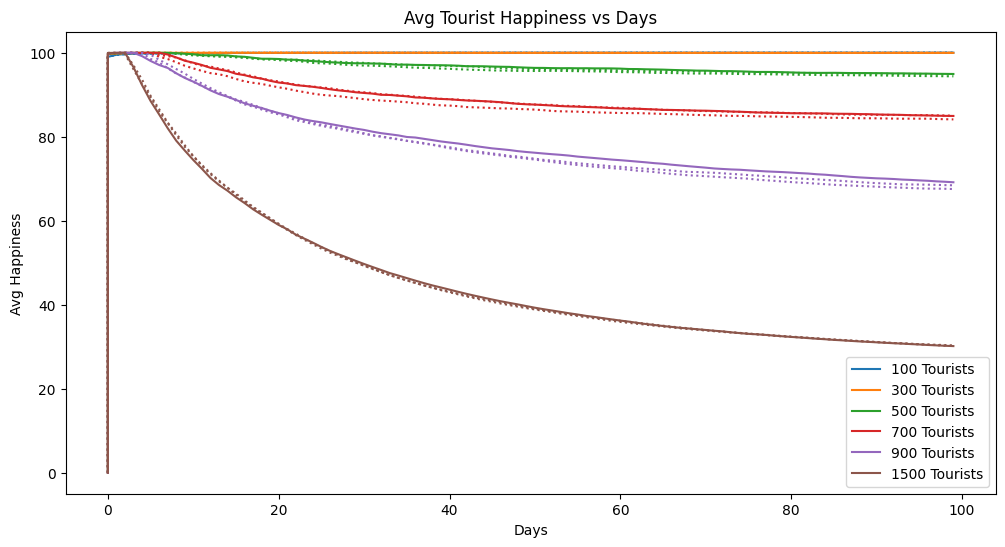

99


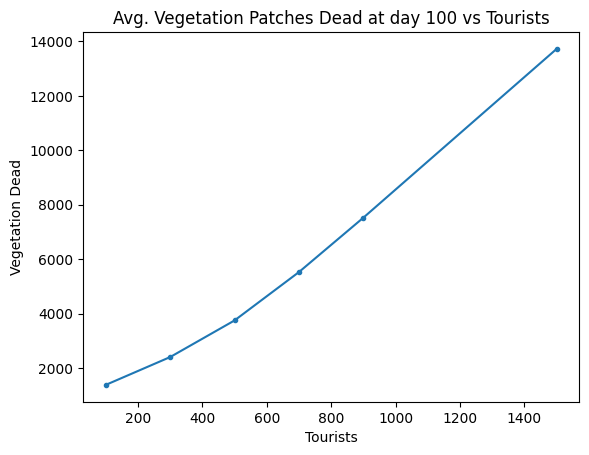

[1404.0, 51.0, 27.666666666666668, 23.333333333333332, 24.333333333333332, 30.666666666666668, 44.666666666666664, 74.33333333333333, 209.0]
[2457.0, 127.33333333333333, 96.33333333333333, 73.33333333333333, 75.66666666666667, 90.0, 124.33333333333333, 242.66666666666666, 815.3333333333334]
[3854.6666666666665, 268.3333333333333, 183.33333333333334, 149.33333333333334, 145.66666666666666, 173.33333333333334, 233.0, 462.3333333333333, 1569.3333333333333]
[5736.666666666667, 479.0, 336.6666666666667, 280.3333333333333, 269.0, 318.6666666666667, 437.3333333333333, 775.3333333333334, 1839.3333333333333]
[7789.0, 550.3333333333334, 384.0, 344.6666666666667, 343.3333333333333, 388.6666666666667, 494.3333333333333, 914.3333333333334, 2521.0]
[14086.333333333334, 764.0, 470.3333333333333, 367.0, 397.6666666666667, 422.3333333333333, 605.3333333333334, 951.6666666666666, 2224.0]


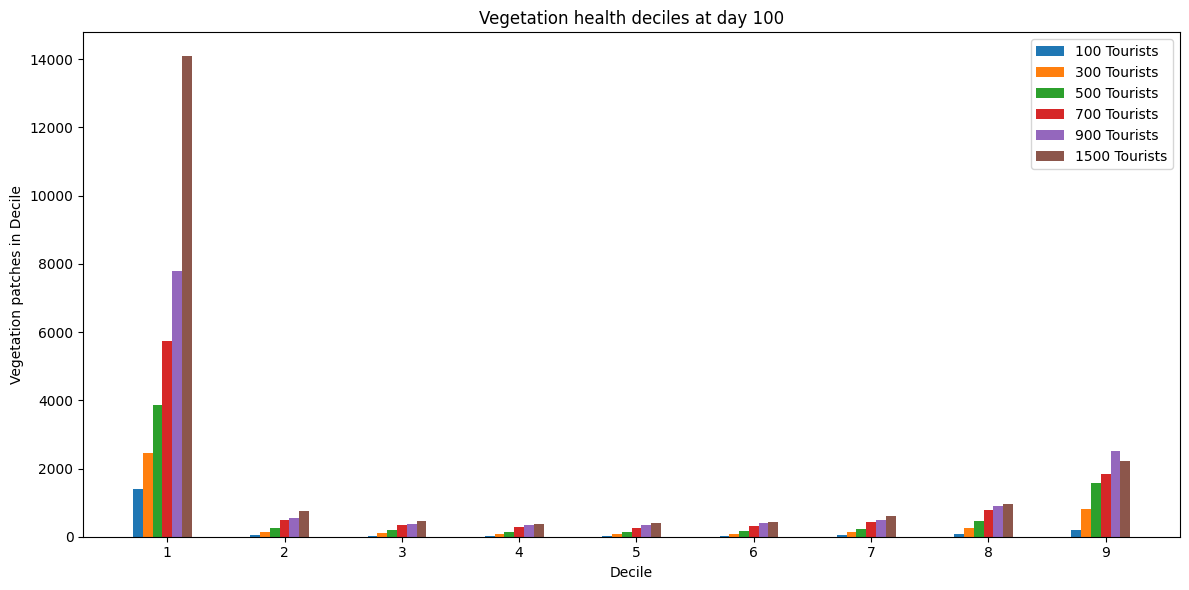

In [3]:
run_plots('Results/cradlemountain experiment-table-100.csv')

[0.0, 1.0, 2.5, 5.0, 7.5, 10.0]
[1000]


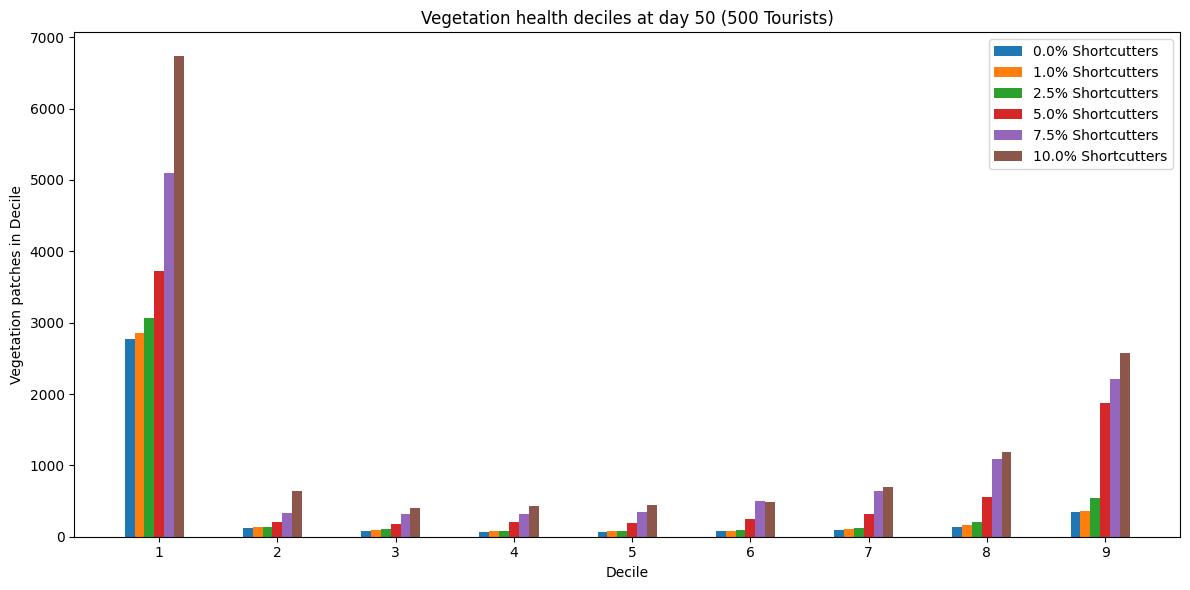

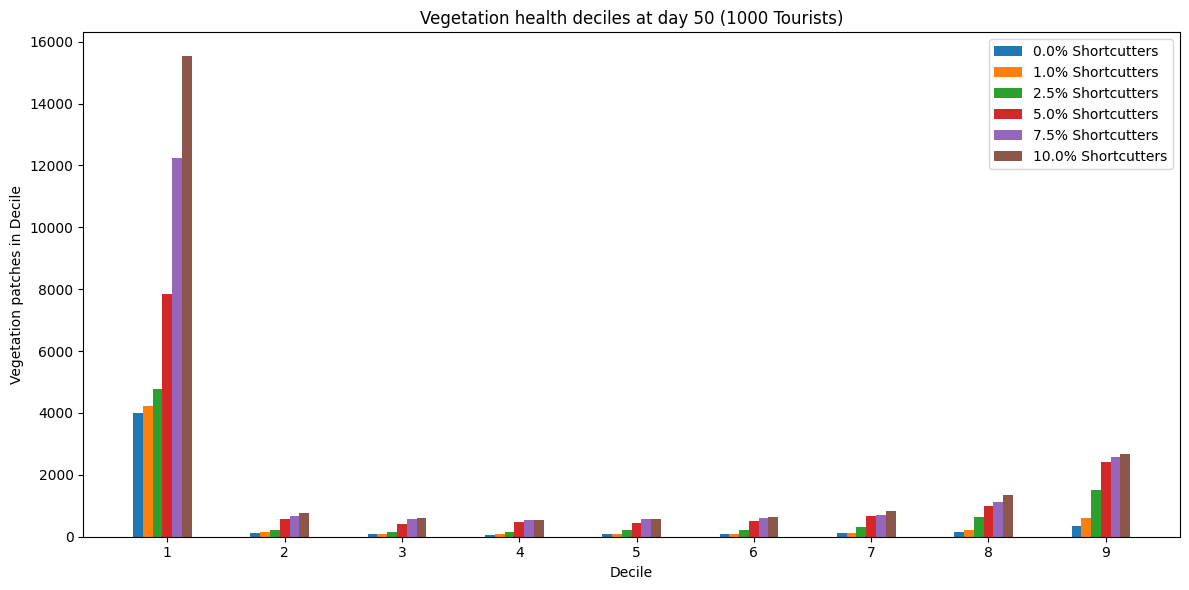

In [4]:


def run_plots_shortcutters(file):
    
    data = pd.read_csv(file, header=6)
    
    shortcutter_values = list(set(data['shortcutting-tourists']))
    print(shortcutter_values)
    
    tourist_counts = [1000]
    shortcutter_values.sort()
    print(tourist_counts)
    
        
  
    #colours = [matplotlib.colors.hsv_to_rgb((0, 1, (i+ 1) / groups)) for i in range(groups)]
    colours = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    
    last_day = data[data['ticks'] == 49]
    
    fig, ax = plt.subplots(figsize=(12, 6))
    bars = []
    
    width = 0.5
    labels = np.arange(1, 10)
    
    
    for i, c in enumerate(shortcutter_values):
        series = [last_day[(last_day['shortcutting-tourists'] == c) & (last_day['tourist-count'] == 500)]['vegetation-decile ' + str(j)].mean() for j in labels]
        
        bars.append(ax.bar((labels) + (width/6) * (i-3), series, width/6, label=f"{c}% Shortcutters"))
        
        
    ax.set_title('Vegetation health deciles at day 50 (500 Tourists)')
    ax.set_xlabel('Decile')
    ax.set_ylabel('Vegetation patches in Decile')
    ax.set_xticks(labels)
    fig.tight_layout()
    
    ax.legend()
    
    plt.show()
    
    
    
    fig, ax = plt.subplots(figsize=(12, 6))
    bars = []
    
    width = 0.5
    labels = np.arange(1, 10)
    
    
    for i, c in enumerate(shortcutter_values):
        series = [last_day[(last_day['shortcutting-tourists'] == c) & (last_day['tourist-count'] == 1000)]['vegetation-decile ' + str(j)].mean() for j in labels]
        
        bars.append(ax.bar((labels) + (width/6) * (i-3), series, width/6, label=f"{c}% Shortcutters"))
        
        
    ax.set_title('Vegetation health deciles at day 50 (1000 Tourists)')
    ax.set_xlabel('Decile')
    ax.set_ylabel('Vegetation patches in Decile')
    ax.set_xticks(labels)
    fig.tight_layout()
    
    ax.legend()
    
    plt.show()
        
    
run_plots_shortcutters('Results/cradlemountain experiment-table-100-shortcutters.csv')

[0.0, 1.5, 0.5, 3.0, 1.0, 5.0, 2.0]


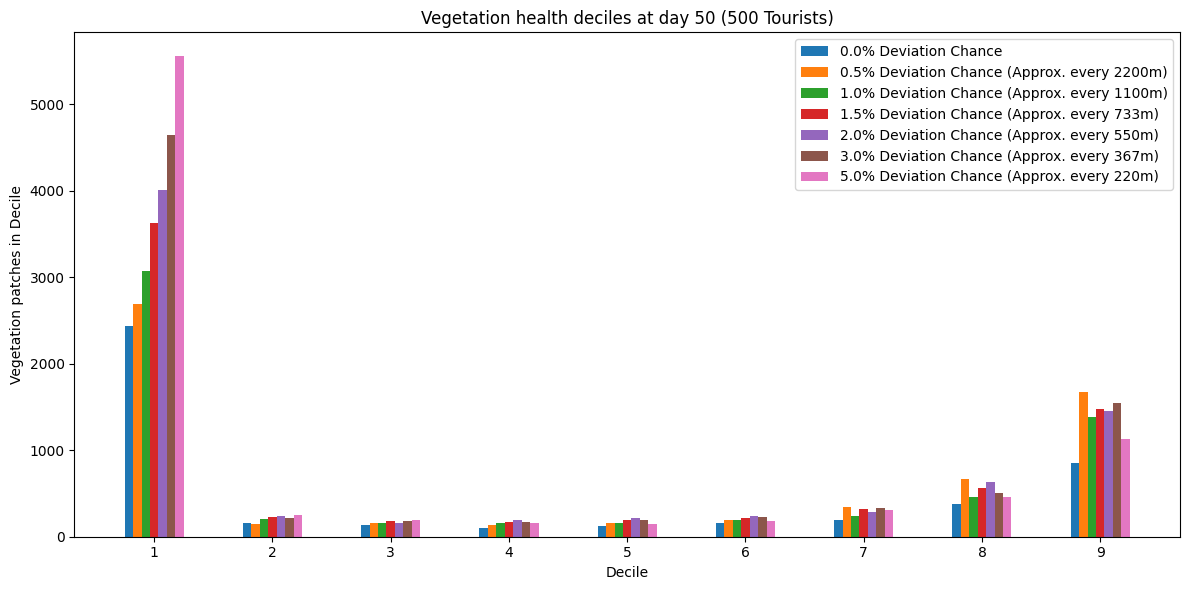

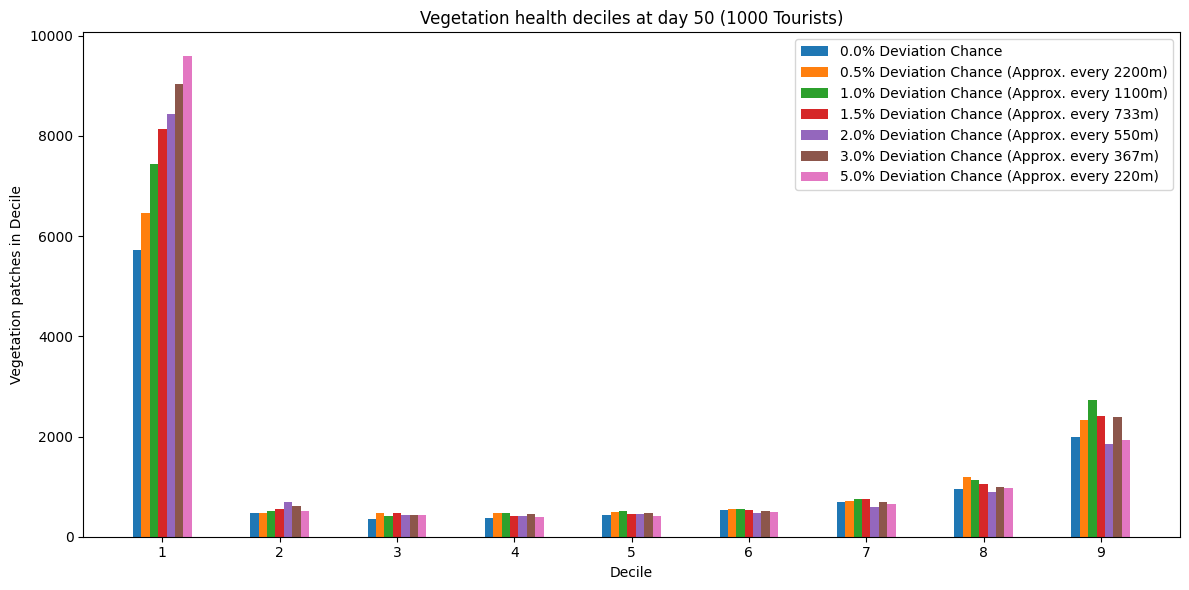

In [5]:


def run_plots_deviation(file):
    
    data = pd.read_csv(file, header=6)
    
    deviation_values = list(set(data['deviation-chance']))
    print(deviation_values)
    
    deviation_values.sort()
    
        
  
    #colours = [matplotlib.colors.hsv_to_rgb((0, 1, (i+ 1) / groups)) for i in range(groups)]
    colours = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    
    last_day = data[data['ticks'] == 49]
    
    fig, ax = plt.subplots(figsize=(12, 6))
    bars = []
    
    width = 0.5
    labels = np.arange(1, 10)
    
    
    for i, c in enumerate(deviation_values):
        series = [last_day[(last_day['deviation-chance'] == c) & (last_day['tourist-count'] == 500)]['vegetation-decile ' + str(j)].mean() for j in labels]
        
        every_m = 0 if i==0 else 11/(c / 100)
        every_text = "" if i == 0 else "(Approx. every {a:.0f}m)"
        bars.append(ax.bar((labels) + (width/7) * (i-3), series, width/7, label=f"{c}% Deviation Chance " + every_text.format(a=every_m)))
        
        
    ax.set_title('Vegetation health deciles at day 50 (500 Tourists)')
    ax.set_xlabel('Decile')
    ax.set_ylabel('Vegetation patches in Decile')
    ax.set_xticks(labels)
    fig.tight_layout()
    
    ax.legend()
    
    plt.show()
    
    
    
    fig, ax = plt.subplots(figsize=(12, 6))
    bars = []
    
    width = 0.5
    labels = np.arange(1, 10)
    
    
    for i, c in enumerate(deviation_values):
        series = [last_day[(last_day['deviation-chance'] == c) & (last_day['tourist-count'] == 1000)]['vegetation-decile ' + str(j)].mean() for j in labels]
        every_m = 0 if i == 0 else 11/(c / 100)
        every_text = "" if i == 0 else "(Approx. every {a:.0f}m)"
        
        bars.append(ax.bar((labels) + (width/7) * (i-3), series, width/7, label=f"{c}% Deviation Chance " + every_text.format(a=every_m)))
        
        
    ax.set_title('Vegetation health deciles at day 50 (1000 Tourists)')
    ax.set_xlabel('Decile')
    ax.set_ylabel('Vegetation patches in Decile')
    ax.set_xticks(labels)
    fig.tight_layout()
    
    ax.legend()
    
    plt.show()
        
    
run_plots_deviation('Results/cradlemountain experiment-table-100-deviation.csv')

[1, 2, 3, 4, 5]


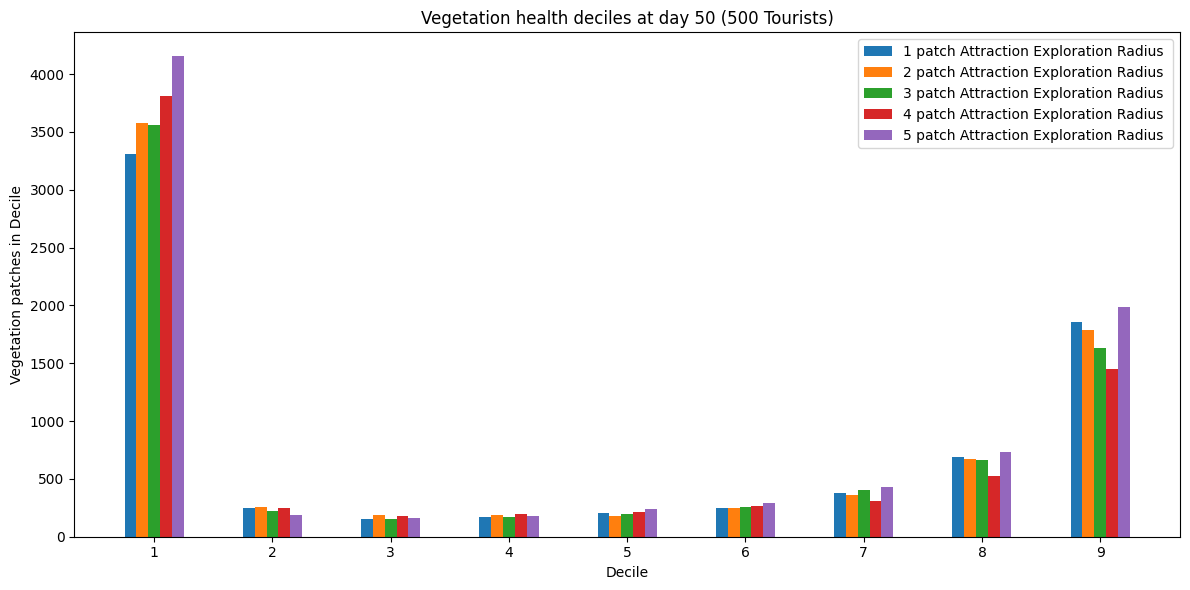

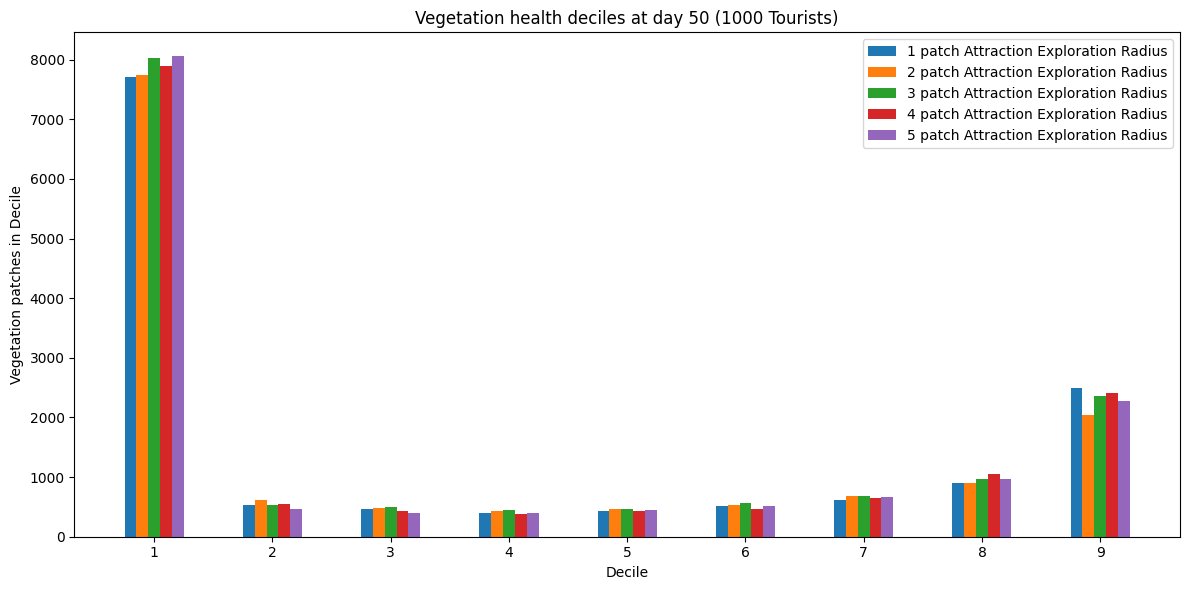

[500, 1000, 1500]


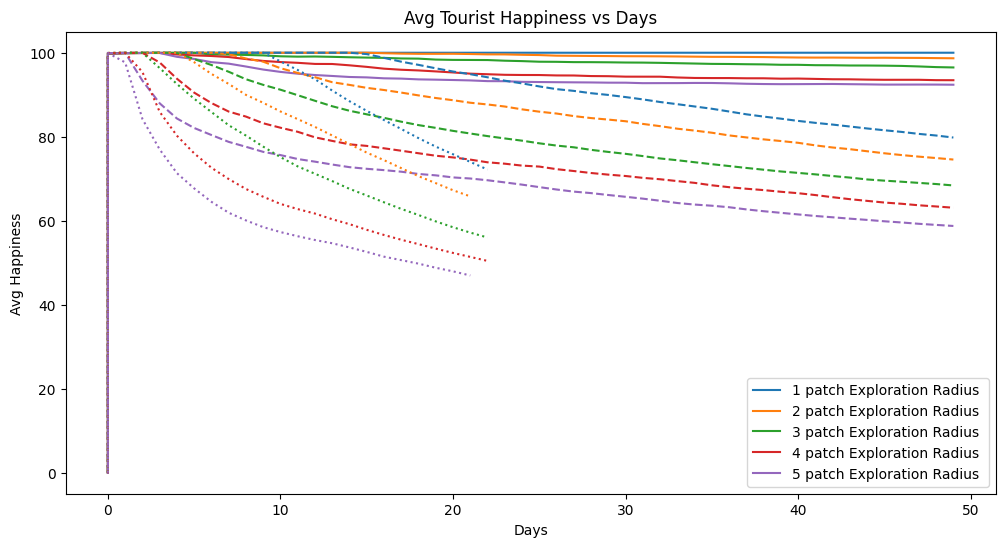

In [6]:


def run_plots_attraction(file):
    
    data = pd.read_csv(file, header=6)
    
    attraction_values = list(set(data['attraction-exploration-radius']))
    print(attraction_values)
    
    attraction_values.sort()
    
        
  
    #colours = [matplotlib.colors.hsv_to_rgb((0, 1, (i+ 1) / groups)) for i in range(groups)]
    colours = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    
    last_day = data[data['ticks'] == 49]
    
    fig, ax = plt.subplots(figsize=(12, 6))
    bars = []
    
    width = 0.5
    labels = np.arange(1, 10)
    
    
    for i, c in enumerate(attraction_values):
        series = [last_day[(last_day['attraction-exploration-radius'] == c) & (last_day['tourist-count'] == 500)]['vegetation-decile ' + str(j)].mean() for j in labels]
        
        bars.append(ax.bar((labels) + width/5 * (i-2), series, width/5, label=f"{c} patch Attraction Exploration Radius "))
        
        
    ax.set_title('Vegetation health deciles at day 50 (500 Tourists)')
    ax.set_xlabel('Decile')
    ax.set_ylabel('Vegetation patches in Decile')
    ax.set_xticks(labels)
    fig.tight_layout()
    
    ax.legend()
    
    plt.show()
    
    
    
    fig, ax = plt.subplots(figsize=(12, 6))
    bars = []
    
    width = 0.5
    labels = np.arange(1, 10)
    
    
    for i, c in enumerate(attraction_values):
        series = [last_day[(last_day['attraction-exploration-radius'] == c) & (last_day['tourist-count'] == 1000)]['vegetation-decile ' + str(j)].mean() for j in labels]
        
        bars.append(ax.bar((labels) + (width/5) * (i-2), series, width/5, label=f"{c} patch Attraction Exploration Radius"))
        
        
    ax.set_title('Vegetation health deciles at day 50 (1000 Tourists)')
    ax.set_xlabel('Decile')
    ax.set_ylabel('Vegetation patches in Decile')
    ax.set_xticks(labels)
    fig.tight_layout()
    
    ax.legend()
    
    plt.show()
    
    
    tourist_counts = list(set(data['tourist-count']))
    tourist_counts.sort()
    print(tourist_counts)
    
    tourist_groups = {}
    
    for c in tourist_counts:
        tourist_groups[c] = data[(data['tourist-count'] == c) & (data['ticks'] < 50)]
        
    groups = len(tourist_groups)
    #colours = [matplotlib.colors.hsv_to_rgb((0, 1, (i+ 1) / groups)) for i in range(groups)]
    colours = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    
    plt.figure(figsize=(12,6))
    
    for i, c in enumerate(tourist_counts):
        radii = set(tourist_groups[c]['attraction-exploration-radius'])
        marker = ['-', '--', ':'][i]
        
        for j, radius in enumerate(radii):
            colour = colours[j]
            run_data = tourist_groups[c][tourist_groups[c]['attraction-exploration-radius'] == radius]
            plt.plot(run_data['ticks'], run_data['happiness-avg / happiness-count'], label= f"{radius} patch Exploration Radius " if i == 0 else None, color=colour, linestyle=marker)
    
    
    plt.title('Avg Tourist Happiness vs Days')
    plt.xlabel('Days')
    plt.ylabel('Avg Happiness')
    plt.legend()
    plt.show()

        
    
run_plots_attraction('Results/cradlemountain experiment-table-100-attractionrad.csv')

In [7]:


tc_data = pd.read_csv('Results/cradlemountain tourist-sensitivity-table.csv', header=6)

tc_last_day = tc_data[tc_data['ticks'] == 49]

baseline = tc_last_day[tc_last_day['tourist-count'] == 500]['count patches with [vegetation-health < 5 and not path? and not lake?]'].mean()


def sensitivity(column, file):
    data = pd.read_csv(file, header=6)
    data = data[data['ticks'] == 49]
    low = min(data[column])
    high = max(data[column])
    
    mid = (low + high) / 2
    
    
    low_val = data[data[column] == low]['count patches with [vegetation-health < 5 and not path? and not lake?]'].mean()
    high_val = data[data[column] == high]['count patches with [vegetation-health < 5 and not path? and not lake?]'].mean()
    
    print(low, mid, high)
    print(low_val, baseline, high_val)
    
    splus = ((high_val - baseline) / abs(high - mid)) * (mid / baseline)
    sminus = ((low_val - baseline) / abs(low - mid)) * (mid / baseline)
    
    print(column, sminus, splus)
    

sensitivity('tourist-count', 'Results/cradlemountain tourist-sensitivity-table.csv')

475 500.0 525
3366.4 3587.2 3775.6
tourist-count -1.2310437109723444 1.0504014272970568


In [8]:
sensitivity('vegetation-growth-rate', 'Results/cradlemountain vgr-sensitivity-table.csv')

14.25 15.0 15.75
3685.6666666666665 3587.2 3480.3333333333335
vegetation-growth-rate 0.5489889979185253 -0.59582218257508


In [9]:
sensitivity('damage-per-step', 'Results/cradlemountain dps-sensitivity-table.csv')

0.95 1.0 1.05
3430.3333333333335 3587.2 3725.3333333333335
damage-per-step -0.8745911388641068 0.7701457032411549


In [10]:
sensitivity('shortcutting-tourists', 'Results/cradlemountain - shortcutters sc-sensitivity-table.csv')

4.75 5.0 5.25
3438.3333333333335 3587.2 3569.3333333333335
shortcutting-tourists -0.8299881058578632 -0.0996134403806107


In [11]:
sensitivity('shortcut-threshold', 'Results/cradlemountain sthr-sensitivity-table.csv')

57 60.0 63
3521.0 3587.2 3542.3333333333335
shortcut-threshold -0.3690900981266716 -0.2501486767766856


In [12]:
sensitivity('deviation-chance', 'Results/cradlemountain - deviation dv-sensitivity-table.csv')

1.425 1.5 1.575
3490.0 3587.2 3641.3333333333335
deviation-chance -0.5419268510258691 0.3018138566755893


In [13]:
sensitivity('attraction-exploration-radius', 'Results/cradlemountain - attractionrad ar-sensitivity-table.csv')

2.85 3.0 3.15
3482.3333333333335 3587.2 3563.3333333333335
attraction-exploration-radius -0.5846714243235192 -0.13306571513529408


In [14]:
sensitivity('attraction-exploration-time', 'Results/cradlemountain aet-sensitivity-table.csv')

19 20.0 21
3644.3333333333335 3587.2 3517.3333333333335
attraction-exploration-time 0.3185399940529308 -0.3895331549211995
